<a href="https://colab.research.google.com/github/Intel-Unnathi-Intership-Program/Product_Sentiment_Analysis/blob/main/TrainingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
warnings.warn("This will not show")

pd.set_option('display.max_columns', None)
import nltk

In [77]:
!pip install gdown



In [ ]:
#https://docs.google.com/spreadsheets/d/1fVUEPZRZVJ1_7LAtfEaTrRQKslLqnnkl/edit?usp=drive_link&ouid=113442891629380336523&rtpof=true&sd=true


Downloading...
From: https://drive.google.com/uc?id=1fVUEPZRZVJ1_7LAtfEaTrRQKslLqnnkl&export=download
To: /content/Book1.xlsx
100%|██████████| 38.2k/38.2k [00:00<00:00, 46.0MB/s]


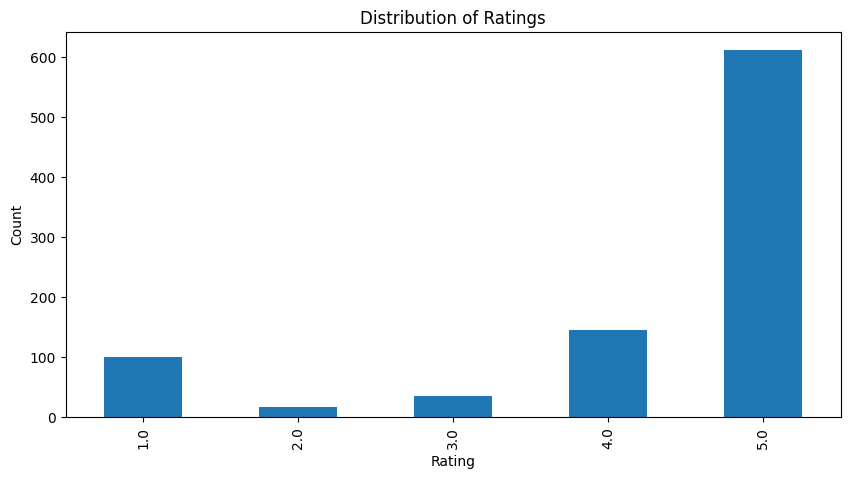

In [78]:
# Install gdown if not already installed
!pip install gdown

import gdown
import pandas as pd

# Google Drive file ID
file_id = '1fVUEPZRZVJ1_7LAtfEaTrRQKslLqnnkl'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
output = 'Book1.xlsx'

# Download the file from Google Drive
gdown.download(url, output, quiet=False)

# Read the downloaded Excel file
df = pd.read_excel(output)

df['review_rating'].value_counts().sort_index().plot(kind='bar', title='count of reviews by stars', figsize=(10,5))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


BASIC NLTK

In [79]:
# Install necessary libraries
!pip install nltk

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Example text
lexample = df['review_body'][120]
example = lexample.lower()

# Tokenize the text
tokens = nltk.word_tokenize(example)

# POS Tagging
tagged = nltk.pos_tag(tokens)

# Named Entity Chunking
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  the/DT
  processor/NN
  was/VBD
  very/RB
  power/NN
  efficient/NN
  i/NN
  develop/VBP
  android/JJ
  apps/NN
  and/CC
  web/NN
  development/NN
  and/CC
  for/IN
  this/DT
  the/DT
  processor/NN
  was/VBD
  beast/JJ
  and/CC
  i/JJ
  do/VBP
  some/DT
  little/JJ
  gaming/NN
  with/IN
  rx580/NN
  which/WDT
  combination/NN
  was/VBD
  superb/VBN
  with/IN
  5400mhz/CD
  ddr5/JJ
  memory/NN
  1/CD
  tb/NN
  ssd/NN
  ./.
  ./.
  ./.
  read/VB
  more/JJR)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


VADAR sentiment analyser

In [80]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(example)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.8008}

In [52]:
#run the polarity score for entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['review_body']
  myid = row['id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/909 [00:00<?, ?it/s]

In [57]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')
#Now we have sentiment score and meta data
vaders

,id,neg,neu,pos,compound,Processor,URL,review_rating,review_body
0,1,0.000,0.834,0.166,0.8008,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,The processor was very power efficient i devel...
1,2,0.000,0.573,0.427,0.9042,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,best budget range and entry level processor ou...
2,3,0.000,0.880,0.120,0.8460,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,This processor is great mid to high range budg...
3,4,0.000,0.874,0.126,0.2212,i5,https://www.amazon.in/Intel-Generation-Desktop...,4.0,"This will not work without graphic card, So be..."
4,5,0.000,0.656,0.344,0.6369,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,Thanku Appario you send me best cpu\nRead more
...,...,...,...,...,...,...,...,...,...
904,905,0.000,1.000,0.000,0.0000,i5,https://www.amazon.in/Intel%C2%AE-CoreTM-i5-10...,5.0,It the one of the processor which all in one\n...
905,906,0.046,0.872,0.082,0.1280,i5,https://www.amazon.in/Intel%C2%AE-CoreTM-i5-10...,1.0,Product was installed in the computer. After w...
906,907,0.561,0.439,0.000,-0.5904,i5,https://www.amazon.in/Intel%C2%AE-CoreTM-i5-10...,3.0,SEAL BROKEN\nRead more
907,908,0.000,0.737,0.263,0.3612,i5,https://www.amazon.in/KINGSTER-i5-2400-Quad-Co...,4.0,First Four Thank you So Much PANCHDEV ENTERPRISE


plot VADERS result

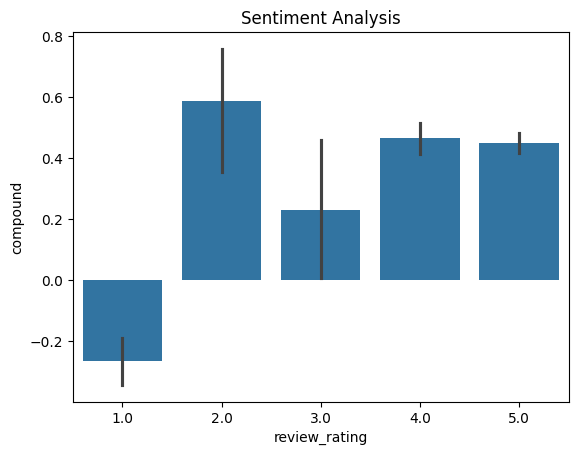

In [58]:
sns.barplot(data=vaders, x='review_rating', y='compound')
plt.title('Sentiment Analysis')
plt.show()

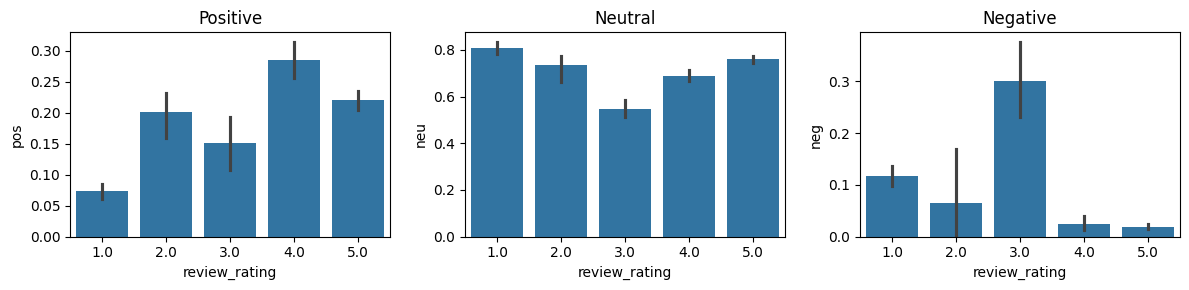

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='review_rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review_rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review_rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Pretrained Model

In [71]:
!pip install transformers



In [74]:
from transformers import AutoTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [75]:
#Vadar result on example
print(example)
sia.polarity_scores(example)


the processor was very power efficient i develop android apps and web development and for this the processor was beast and i do some little gaming with rx580 which combination was superb  with 5400mhz ddr5 memory 1 tb ssd . . .
read more


{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.8008}

In [81]:
#Run for roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.004317704, 'roberta_neu': 0.08033483, 'roberta_pos': 0.9153474}


In [82]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
from transformers import pipeline
from tqdm.notebook import tqdm  # Assuming you use tqdm for progress tracking
import pandas as pd

# Load your DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_file.csv')

# Initialize the sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

# Create an empty list to store sentiment analysis results
sentiment_results = []

# Iterate over rows in DataFrame
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['id']

    # Perform sentiment analysis
    sentiment = sent_pipeline(text)

    # Append sentiment analysis result to the list
    sentiment_results.append({
        'id': myid,
        'review_body': text,
        'sentiment_label': sentiment[0]['label'],
        'sentiment_score': sentiment[0]['score']
    })

# Convert sentiment_results list to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Merge sentiment results DataFrame back to original DataFrame on 'id'
df_with_sentiment = pd.merge(df, sentiment_df, on='id', how='left')

# Display the updated DataFrame with sentiment analysis results
print(df_with_sentiment.head())


In [87]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')
results_df

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Processor,URL,review_rating,review_body
0,1,0.000,0.796,0.204,0.8008,0.004556,0.072080,0.923364,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,The processor was very power efficient i devel...
1,2,0.000,0.573,0.427,0.9042,0.002602,0.039771,0.957627,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,best budget range and entry level processor ou...
2,3,0.000,0.880,0.120,0.8460,0.005583,0.056860,0.937558,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,This processor is great mid to high range budg...
3,4,0.000,0.874,0.126,0.2212,0.746755,0.235586,0.017659,i5,https://www.amazon.in/Intel-Generation-Desktop...,4.0,"This will not work without graphic card, So be..."
4,5,0.000,0.656,0.344,0.6369,0.007709,0.092189,0.900102,i5,https://www.amazon.in/Intel-Generation-Desktop...,5.0,Thanku Appario you send me best cpu\nRead more
...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,0.000,1.000,0.000,0.0000,0.043655,0.829518,0.126828,i5,https://www.amazon.in/Intel%C2%AE-CoreTM-i5-10...,5.0,It the one of the processor which all in one\n...
905,906,0.046,0.872,0.082,0.1280,0.871311,0.121620,0.007069,i5,https://www.amazon.in/Intel%C2%AE-CoreTM-i5-10...,1.0,Product was installed in the computer. After w...
906,907,0.561,0.439,0.000,-0.5904,0.364341,0.604774,0.030885,i5,https://www.amazon.in/Intel%C2%AE-CoreTM-i5-10...,3.0,SEAL BROKEN\nRead more
907,908,0.000,0.737,0.263,0.3612,0.001142,0.020238,0.978619,i5,https://www.amazon.in/KINGSTER-i5-2400-Quad-Co...,4.0,First Four Thank you So Much PANCHDEV ENTERPRISE


Compare Scores between models

In [89]:
results_df.columns


Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Processor', 'URL',
       'review_rating', 'review_body'],
      dtype='object')

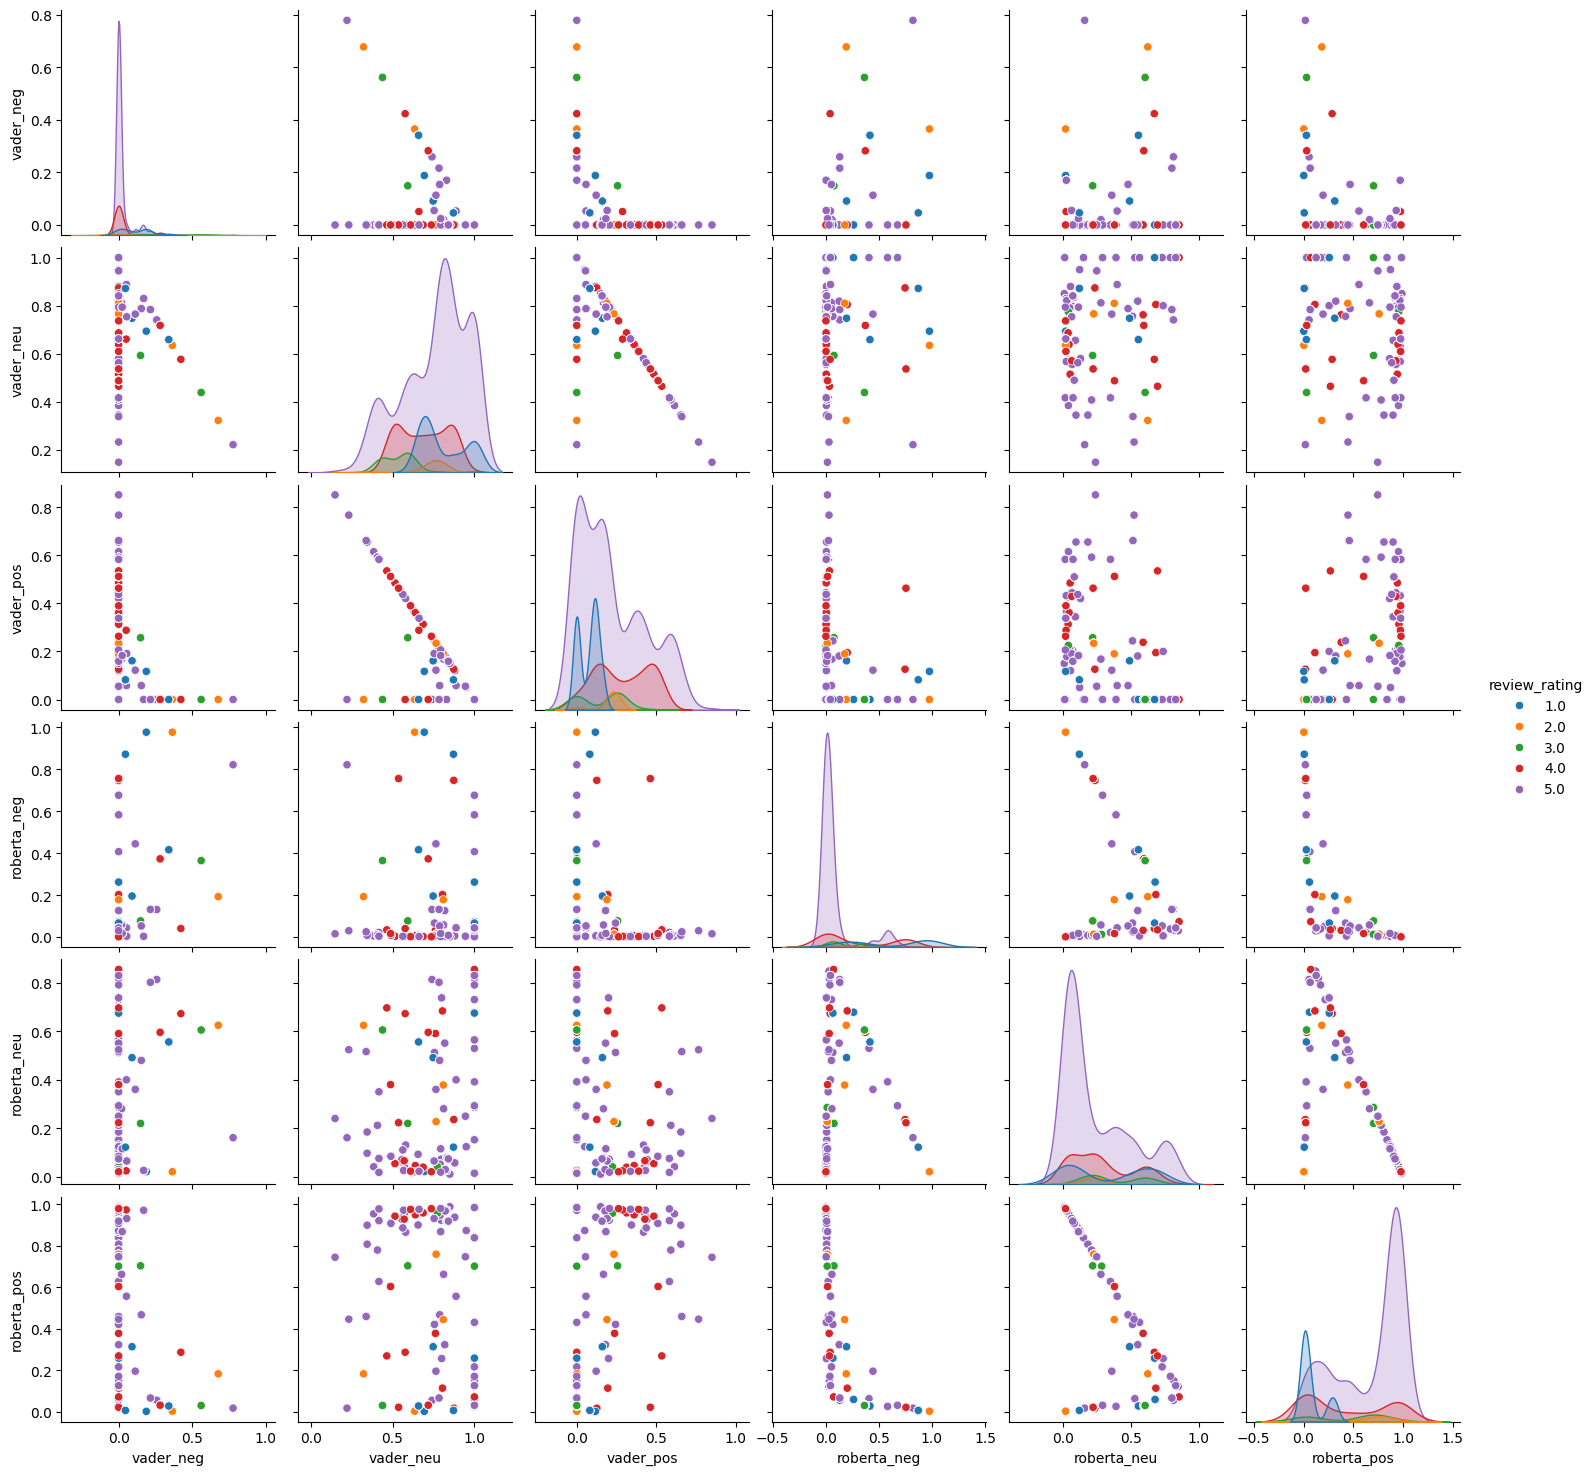

In [91]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='review_rating',
            palette='tab10')
plt.show()

Step 4: Review Examples:¶
Positive 1-Star and Negative 5-Star Reviews
Lets look at some examples where the model scoring and review score differ the most.


In [96]:
results_df.query('review_rating == 1') \
    .sort_values('roberta_pos', ascending=False)['review_body'].values[0]

'The processor is Good But too expensive here In Local Market Its around 25000 RupeesI didnt Like Its Rate but overall its Ok\nRead more'

In [98]:
results_df.query('review_rating == 1') \
    .sort_values('vader_pos', ascending=False)['review_body'].values[0]

'The processor is Good But too expensive here In Local Market Its around 25000 RupeesI didnt Like Its Rate but overall its Ok\nRead more'

In [100]:
# nevative sentiment 5-Star view
results_df.query('review_rating == 5') \
    .sort_values('roberta_neg', ascending=False)['review_body'].values[0]

'Bad quality'

In [102]:
results_df.query('review_rating == 5') \
    .sort_values('vader_neg', ascending=False)['review_body'].values[0]

'Bad quality'

In [103]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


  0%|          | 0/909 [00:00<?, ?it/s]

In [109]:
from transformers import pipeline
from tqdm.notebook import tqdm  # Assuming you use tqdm for progress tracking
import pandas as pd

# Load your DataFrame (replace with your actual data loading code)
# df = pd.read_csv('your_file.csv')

# Initialize the sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

# Create an empty list to store sentiment analysis results
sentiment_results = []

# Iterate over rows in DataFrame
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['id']

    # Perform sentiment analysis
    sentiment = sent_pipeline(text)

    # Append sentiment analysis result to the list
    sentiment_results.append({
        'id': myid,
        'review_body': text,
        'sentiment_label': sentiment[0]['label'],
        'sentiment_score': sentiment[0]['score']
    })

# Convert sentiment_results list to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

# Merge sentiment results DataFrame back to original DataFrame on 'id'
df_with_sentiment = pd.merge(df, sentiment_df, on='id', how='left')

# Display the updated DataFrame with sentiment analysis results
print(df_with_sentiment.head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


  0%|          | 0/909 [00:00<?, ?it/s]

   id Processor                                                URL  \
0   1        i5  https://www.amazon.in/Intel-Generation-Desktop...   
1   2        i5  https://www.amazon.in/Intel-Generation-Desktop...   
2   3        i5  https://www.amazon.in/Intel-Generation-Desktop...   
3   4        i5  https://www.amazon.in/Intel-Generation-Desktop...   
4   5        i5  https://www.amazon.in/Intel-Generation-Desktop...   

   review_rating                                      review_body_x  \
0            5.0  The processor was very power efficient i devel...   
1            5.0  best budget range and entry level processor ou...   
2            5.0  This processor is great mid to high range budg...   
3            4.0  This will not work without graphic card, So be...   
4            5.0     Thanku Appario you send me best cpu\nRead more   

                                       review_body_y sentiment_label  \
0  The processor was very power efficient i devel...        POSITIVE   
1  best 